In [67]:
import sys
import os
sys.path.append(
    os.path.abspath(
        os.path.dirname(
            # apparently in jupyter the variable __file__ is not defined
            os.path.abspath(os.path.realpath("__file__")) 
        )+"/.."
    )
)

import numpy as np
import seaborn as sns
import ipywidgets as widgets
from matplotlib import pyplot as plt

from common import persistency, relspecs


In [47]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [3]:
tsets = persistency.load_tsets(relspecs.activity)


tsets creation time: 2021-12-14 07:02:34.783778
divided: [(2700, 20), (2700, 181), (2700, 188), (2700, 1), (2700, 6), (2700, 7), (2700, 10), (2700, 67), (2700, 3)]
scaling field <F:iati_identifier n_features:20> section.shape: (2700, 20)
resulting section_scaled.shape: (2700, 20)
scaling field <F:default_lang n_features:181> section.shape: (2700, 181)
resulting section_scaled.shape: (2700, 181)
scaling field <F:default_currency n_features:188> section.shape: (2700, 188)
resulting section_scaled.shape: (2700, 188)
scaling field <F:humanitarian n_features:1> section.shape: (2700, 1)
resulting section_scaled.shape: (2700, 1)
scaling field <F:activity_status_code n_features:6> section.shape: (2700, 6)
resulting section_scaled.shape: (2700, 6)
scaling field <F:collaboration_type_code n_features:7> section.shape: (2700, 7)
resulting section_scaled.shape: (2700, 7)
scaling field <F:default_flow_type n_features:10> section.shape: (2700, 10)
resulting section_scaled.shape: (2700, 10)
scaling fi

In [35]:
print(tsets.train.shape)
print(tsets.test.shape)
data = np.vstack([tsets.train,tsets.test])
print(data.shape)

(2700, 483)
(300, 483)
(3000, 483)


In [36]:
tsne = TSNE().fit_transform(data)

In [37]:
tsne.shape

(3000, 2)

In [53]:
reduced_fields = []
for i in range(relspecs.activity.n_fields):
    start,end = relspecs.activity.fields_intervals(with_set_index=False)[i]
    section = data[:,start:end]
    pca = PCA(n_components=1,whiten=True)
    reduced = pca.fit_transform(section)
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(reduced)
    reduced_fields.append(scaled[:,0])

/home/frablum/.local/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()
/home/frablum/.local/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/home/frablum/.local/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


In [54]:
reduced_fields[0]

array([0.05939785, 0.05911794, 0.04623823, ..., 0.05399206, 0.07570483,
       0.02511973], dtype=float32)

In [75]:
w = widgets.IntSlider(
    value=0,
    min=0,
    max=relspecs.activity.n_fields-1,
    step=1,
    description='Test:',
    disabled=False,
    #continuous_update=False,
    orientation='horizontal',
    #readout=True,
    readout_format='d'
)
def plot(i):
    start,end = relspecs.activity.fields_intervals(with_set_index=False)[i]
    section = data[:,start:end]
    fig = plt.figure()
    sns.scatterplot(tsne[:,0],tsne[:,1],hue=reduced_fields[i])
    fig.suptitle(relspecs.activity.fields[i].name)
widgets.interact(plot, i=w)


interactive(children=(IntSlider(value=0, description='Test:', max=8), Output()), _dom_classes=('widget-interac…

<function __main__.plot(i)>

/home/frablum/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/frablum/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/frablum/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

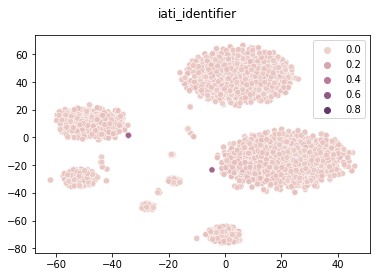

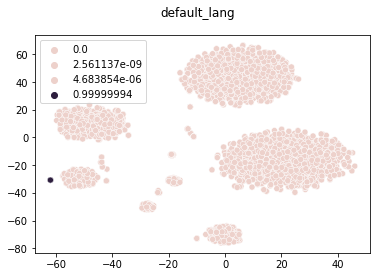

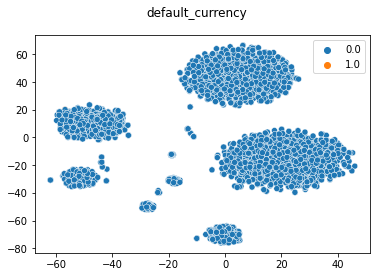

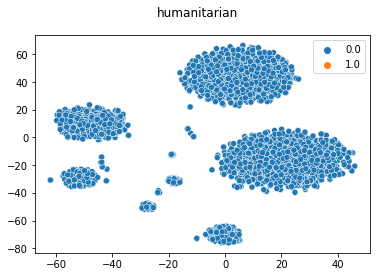

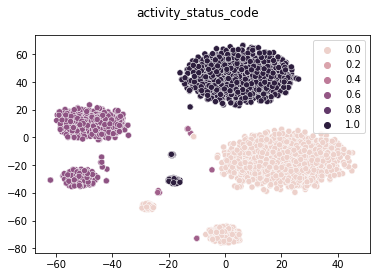

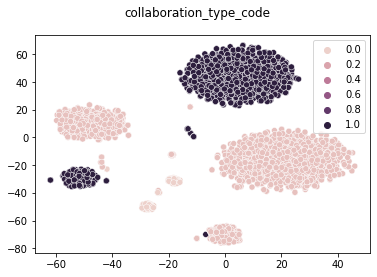

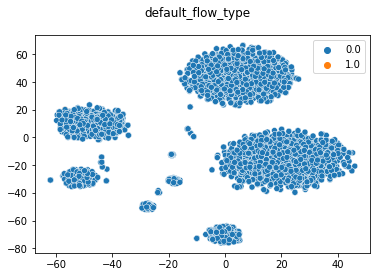

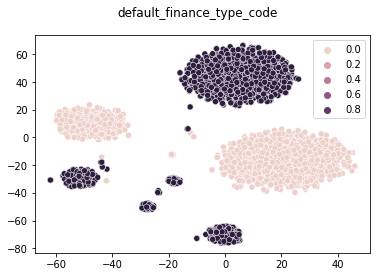

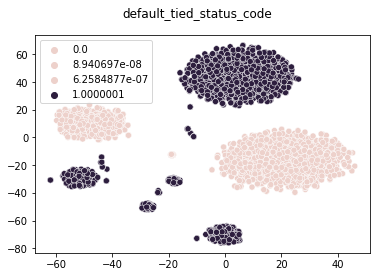

In [76]:
for i in range(relspecs.activity.n_fields):
    plot(i)

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>